In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import detrend_none
import japanize_matplotlib
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
import os

if os.path.exists("../../stylesheet/k_dm.mplstyle"):
    plt.style.use("../../stylesheet/k_dm.mplstyle")

## サンプルデータを作成する

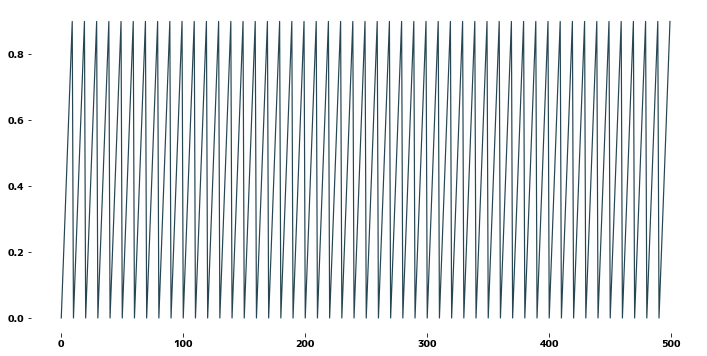

In [3]:
data_sin = [0.1*(i%10) for i in range(500)]

plt.figure(figsize=(12, 6))
plt.plot(data_sin)
plt.show()

### 自己相関を見る
１０で割ったあまりをプロットしているので、１０時点はなれた箇所との自己相関が最大になるはずです。

補足：Statsmodelsのplot_acf関数と結果を合わせるために、波形データ全体から平均値を引いています。

[matplotlib.pyplot.acorr — Matplotlib 3.5.2 documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.acorr.html)

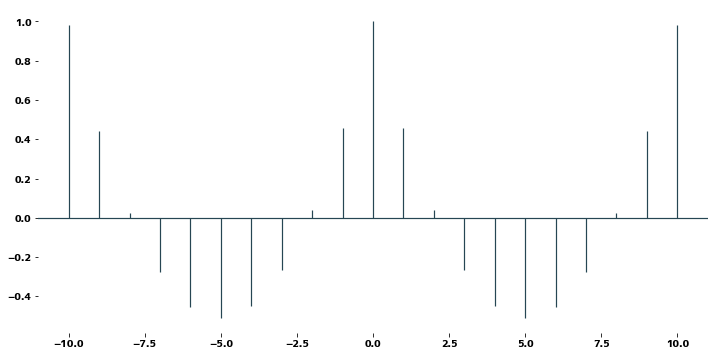

In [4]:
plt.figure(figsize=(12, 6))
plt.acorr(np.array(data_sin) - np.mean(data_sin), 
                detrend=detrend_none, 
                maxlags=10)
plt.show()

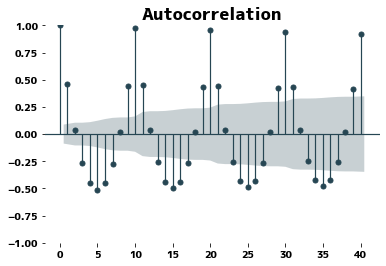

In [5]:
plot_acf(data_sin, lags=40, alpha=.05)
plt.show()

## AR(2)の自己相関を見る
AR(2)は２つの時点のデータのみから現時点の値を決めているので、（現在の値と関係がある時点がいつかを調べたいというモチベーションで自己相関を見るのならば）自己相関は２つの時点のみ高いようなプロットになってほしいです。

==AR(2)過程の長さ500のデータを作成==


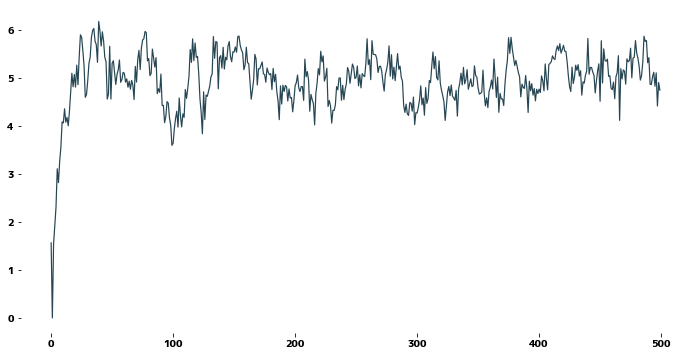

In [6]:
def create_ARdata(phis=[0.1], N=500, init=1, c=1, sigma=0.3):
    """AR過程のデータを作成する"""
    print(f"==AR({len(phis)})過程の長さ{N}のデータを作成==")
    data = np.zeros(N)
    data[0] = init + np.random.normal(0, sigma)

    for t in range(2, N):
        res = c + np.random.normal(0, sigma)
        for j, phi_j in enumerate(phis):
            res += phi_j * data[t - j - 1]
        data[t] = res
    return data


data_ar = create_ARdata(phis=[0.5, 0.3])
plt.figure(figsize=(12, 6))
plt.plot(data_ar)
plt.show()

### 自己相関を見る
実際には、２つの時点以外の箇所でも自己相関が高くなります。そのため、自己相関をみるだけでは「２つの時点の値をもとに現在の値が決まっているかもしれない」と推測することはできません。

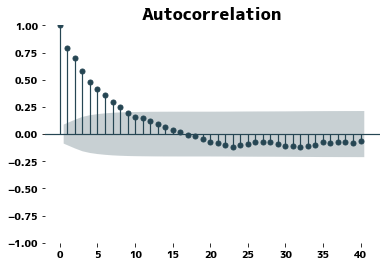

In [7]:
plot_acf(data_ar, lags=40, alpha=.05)
plt.show()